

# Two Problems for Lab 3:


# Problem 1: Gender Recognition by Voice

From the description file at https://data.world/ml-research/gender-recognition-by-voice:

In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:

*  [The Harvard-Haskins Database of Regularly-Timed Speech](http://nsi.wegall.net/)
*  Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
*  [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
*  [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/dbs_awb.html)

Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above
Acoustic Properties Measured

The following acoustic properties of each voice are measured:

*    __duration:__ length of signal
*    __meanfreq:__ mean frequency (in kHz)
*    __sd:__ standard deviation of frequency
*    __median:__ median frequency (in kHz)
*    __Q25:__ first quantile (in kHz)
*    __Q75:__ third quantile (in kHz)
*    __IQR:__ interquantile range (in kHz)
*    __skew:__ skewness (see note in specprop description)
*    __kurt:__ kurtosis (see note in specprop description)
*    __sp.ent:__ spectral entropy
*    __sfm:__ spectral flatness
*    __mode:__ mode frequency
*    __centroid:__ frequency centroid (see specprop)
*    __peakf:__ peak frequency (frequency with highest energy)
*    __meanfun:__ average of fundamental frequency measured across acoustic signal
*    __minfun:__ minimum fundamental frequency measured across acoustic signal
*    __maxfun:__ maximum fundamental frequency measured across acoustic signal
*    __meandom:__ average of dominant frequency measured across acoustic signal
*    __mindom:__ minimum of dominant frequency measured across acoustic signal
*    __maxdom:__ maximum of dominant frequency measured across acoustic signal
*    __dfrange:__ range of dominant frequency measured across acoustic signal
*    __modindx:__ modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

The gender of the speaker is given in the __label__ column.

Note, the features for duration and peak frequency (peakf) were removed from training. Duration refers to the length of the recording, which for training, is cut off at 20 seconds. Peakf was omitted from calculation due to time and CPU constraints in calculating the value. In this case, all records will have the same value for duration (20) and peak frequency (0).

Load file using the code below.

#### Question 1:

Which two features are most indicative of gendered voice?

#### Question 2:

Preform Linear Regression, Logistic Regression, and Quadratic Discriminant Analysis on the features, graphing the resulting fits. How does the two feature fit compare to the fit on all features?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/voice.csv")

data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

The data set has dimension 3168 x 21, without any missing values.

In [ ]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
## Drop feature columns
X = data.drop(columns=['label'])

## Set up target variable y
y = data['label']

## Normalize feature data by centering on the mean and dividing by std
X = (X-X.mean())/X.std()

X.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3168.000000,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03
mean,2.512020e-16,7.177199e-17,-8.971499e-17,-1.076580e-16,-1.085551e-15,1.435440e-16,-8.522924e-17,0.000000,2.512020e-15,-2.870880e-16,1.435440e-16,2.512020e-16,-5.024040e-16,1.704585e-16,-1.220124e-15,-2.332590e-16,-7.177199e-17,7.177199e-17,-1.794300e-17,-4.934325e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.731066e+00,-2.327777e+00,-4.803229e+00,-2.880601e+00,-7.691381e+00,-1.630357e+00,-7.070892e-01,-0.255691,-3.478836e+00,-2.091807e+00,-2.140872e+00,-4.731066e+00,-2.700601e+00,-1.406176e+00,-5.178304e+00,-1.563958e+00,-7.545755e-01,-1.431196e+00,-1.418913e+00,-1.454543e+00
25%,-5.763944e-01,-9.111334e-01,-4.408165e-01,-6.033124e-01,-6.776157e-01,-9.758452e-01,-3.515125e-01,-0.229002,-7.406945e-01,-8.459608e-01,-6.122303e-01,-5.763944e-01,-7.989074e-01,-9.666296e-01,-1.620488e-01,-7.794727e-01,-7.082925e-01,-8.454507e-01,-8.379759e-01,-6.193636e-01
50%,1.314199e-01,1.218547e-01,1.213335e-01,-3.475208e-03,3.888670e-02,2.330498e-01,-2.223937e-01,-0.209370,1.476175e-01,-6.692869e-02,2.761141e-01,1.314199e-01,-7.083289e-02,4.842729e-01,4.104155e-01,-1.207455e-01,-4.614500e-01,-1.564521e-02,-1.401041e-02,-2.879298e-01
75%,6.096510e-01,5.941816e-01,6.874959e-01,7.289110e-01,7.993273e-01,6.980735e-01,-4.916214e-02,-0.169864,7.467041e-01,7.067315e-01,7.230590e-01,6.096510e-01,8.287991e-01,5.776489e-01,6.188852e-01,6.625126e-01,2.790774e-01,5.567874e-01,5.674817e-01,2.966132e-01
max,2.346999e+00,3.491858e+00,2.079304e+00,2.195809e+00,2.060318e+00,3.924821e+00,7.448431e+00,9.434944,1.931313e+00,2.448833e+00,1.485929e+00,2.346999e+00,2.935500e+00,8.703446e+00,6.739858e-01,4.052648e+00,6.419284e+00,4.776814e+00,4.786629e+00,6.350730e+00


#### Proportion of gender

In [ ]:
display(y.value_counts())

male      1584
female    1584
Name: label, dtype: int64

#### Question 1:
Which two features are most indicative of gendered voice?

In [ ]:
# # Use a lambda function to map 'male' to "M" and 'female' to "F"
data['label'] = data['label'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
# Calculate the correlation between features and the 'label'
correlations = data.corr()

# # Filter only the correlation with the 'label'
correlation_label = correlations['label'].abs().sort_values(ascending = False)

top_two_features = correlation_label.index[1:3] # The first row is 'label'

print("The two most indicative features of gender voice are:")
print(top_two_features)

The two most indicative features of gender voice are:
Index(['meanfun', 'IQR'], dtype='object')


*The two most indicative features of gender voice are:   mean_fun, IQR

### Heatmap

<Axes: >

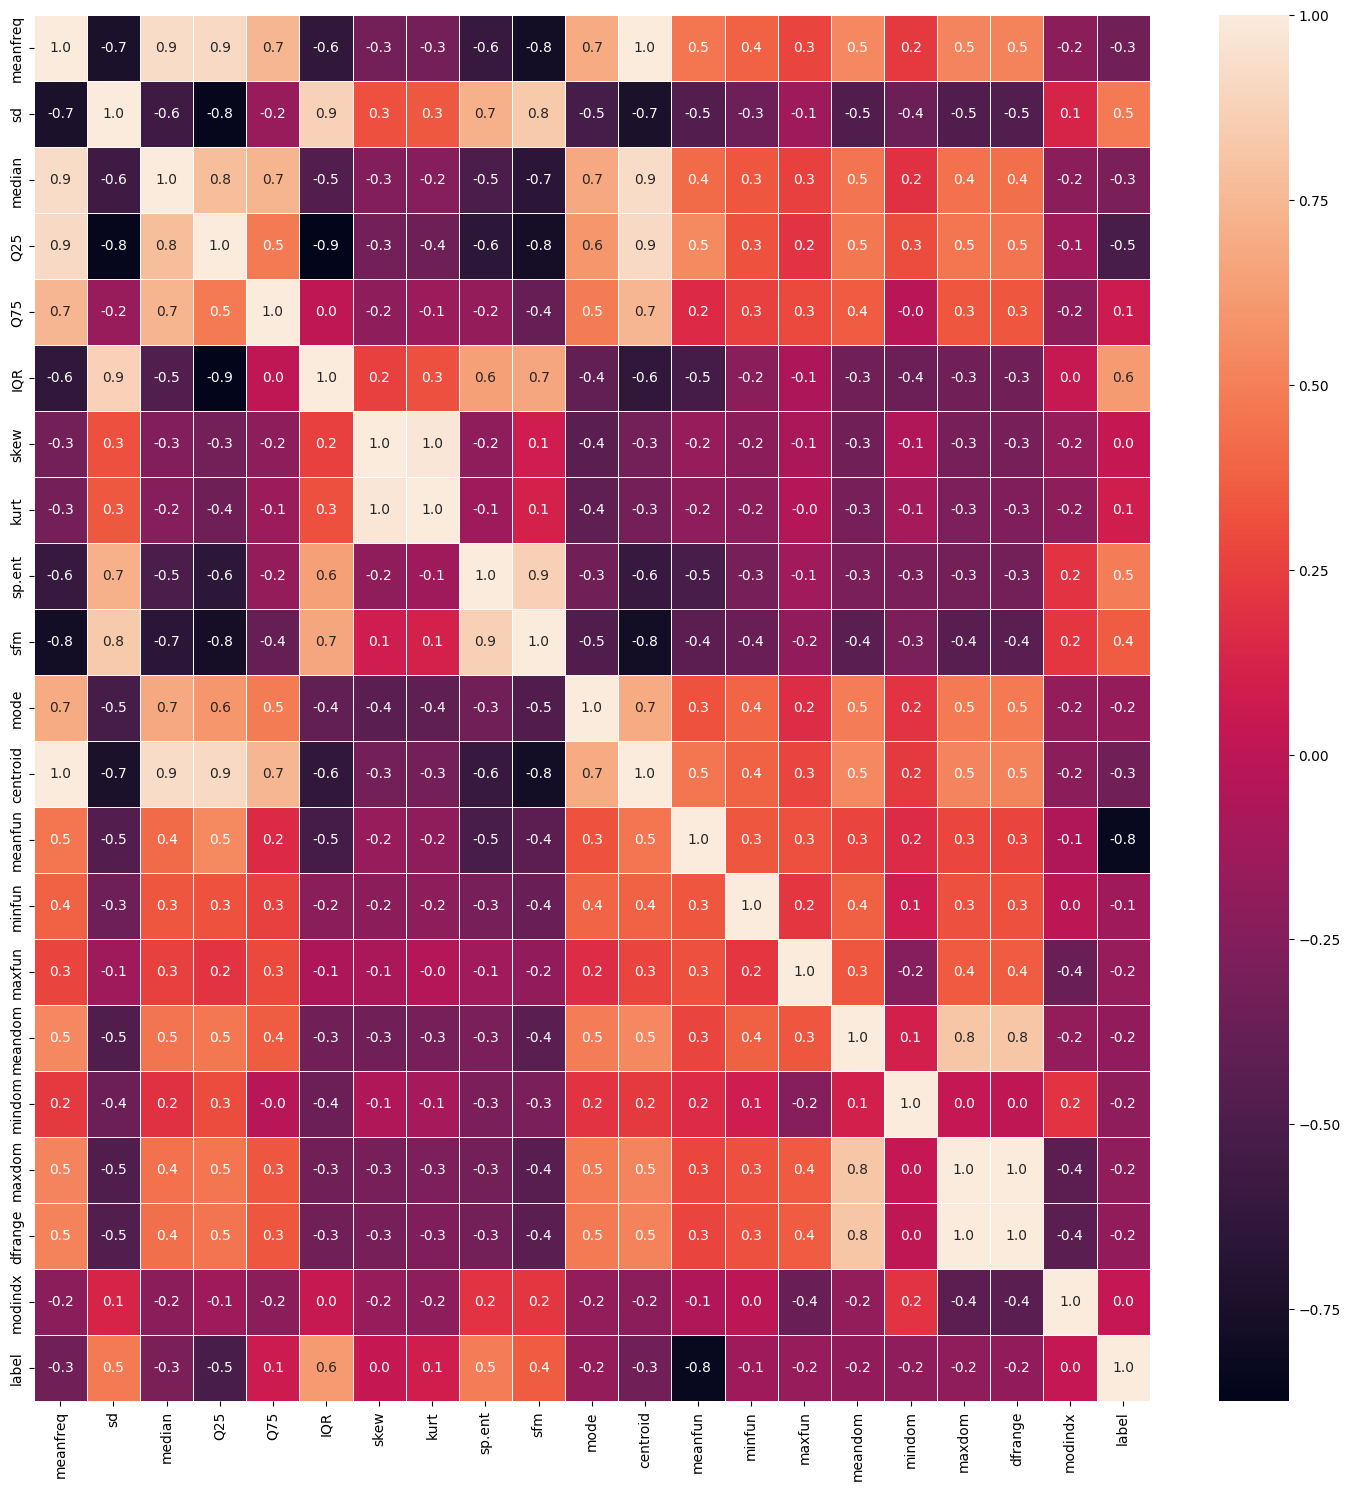

In [ ]:
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot = True, linewidth = .5, fmt='.1f')

### Violin plots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

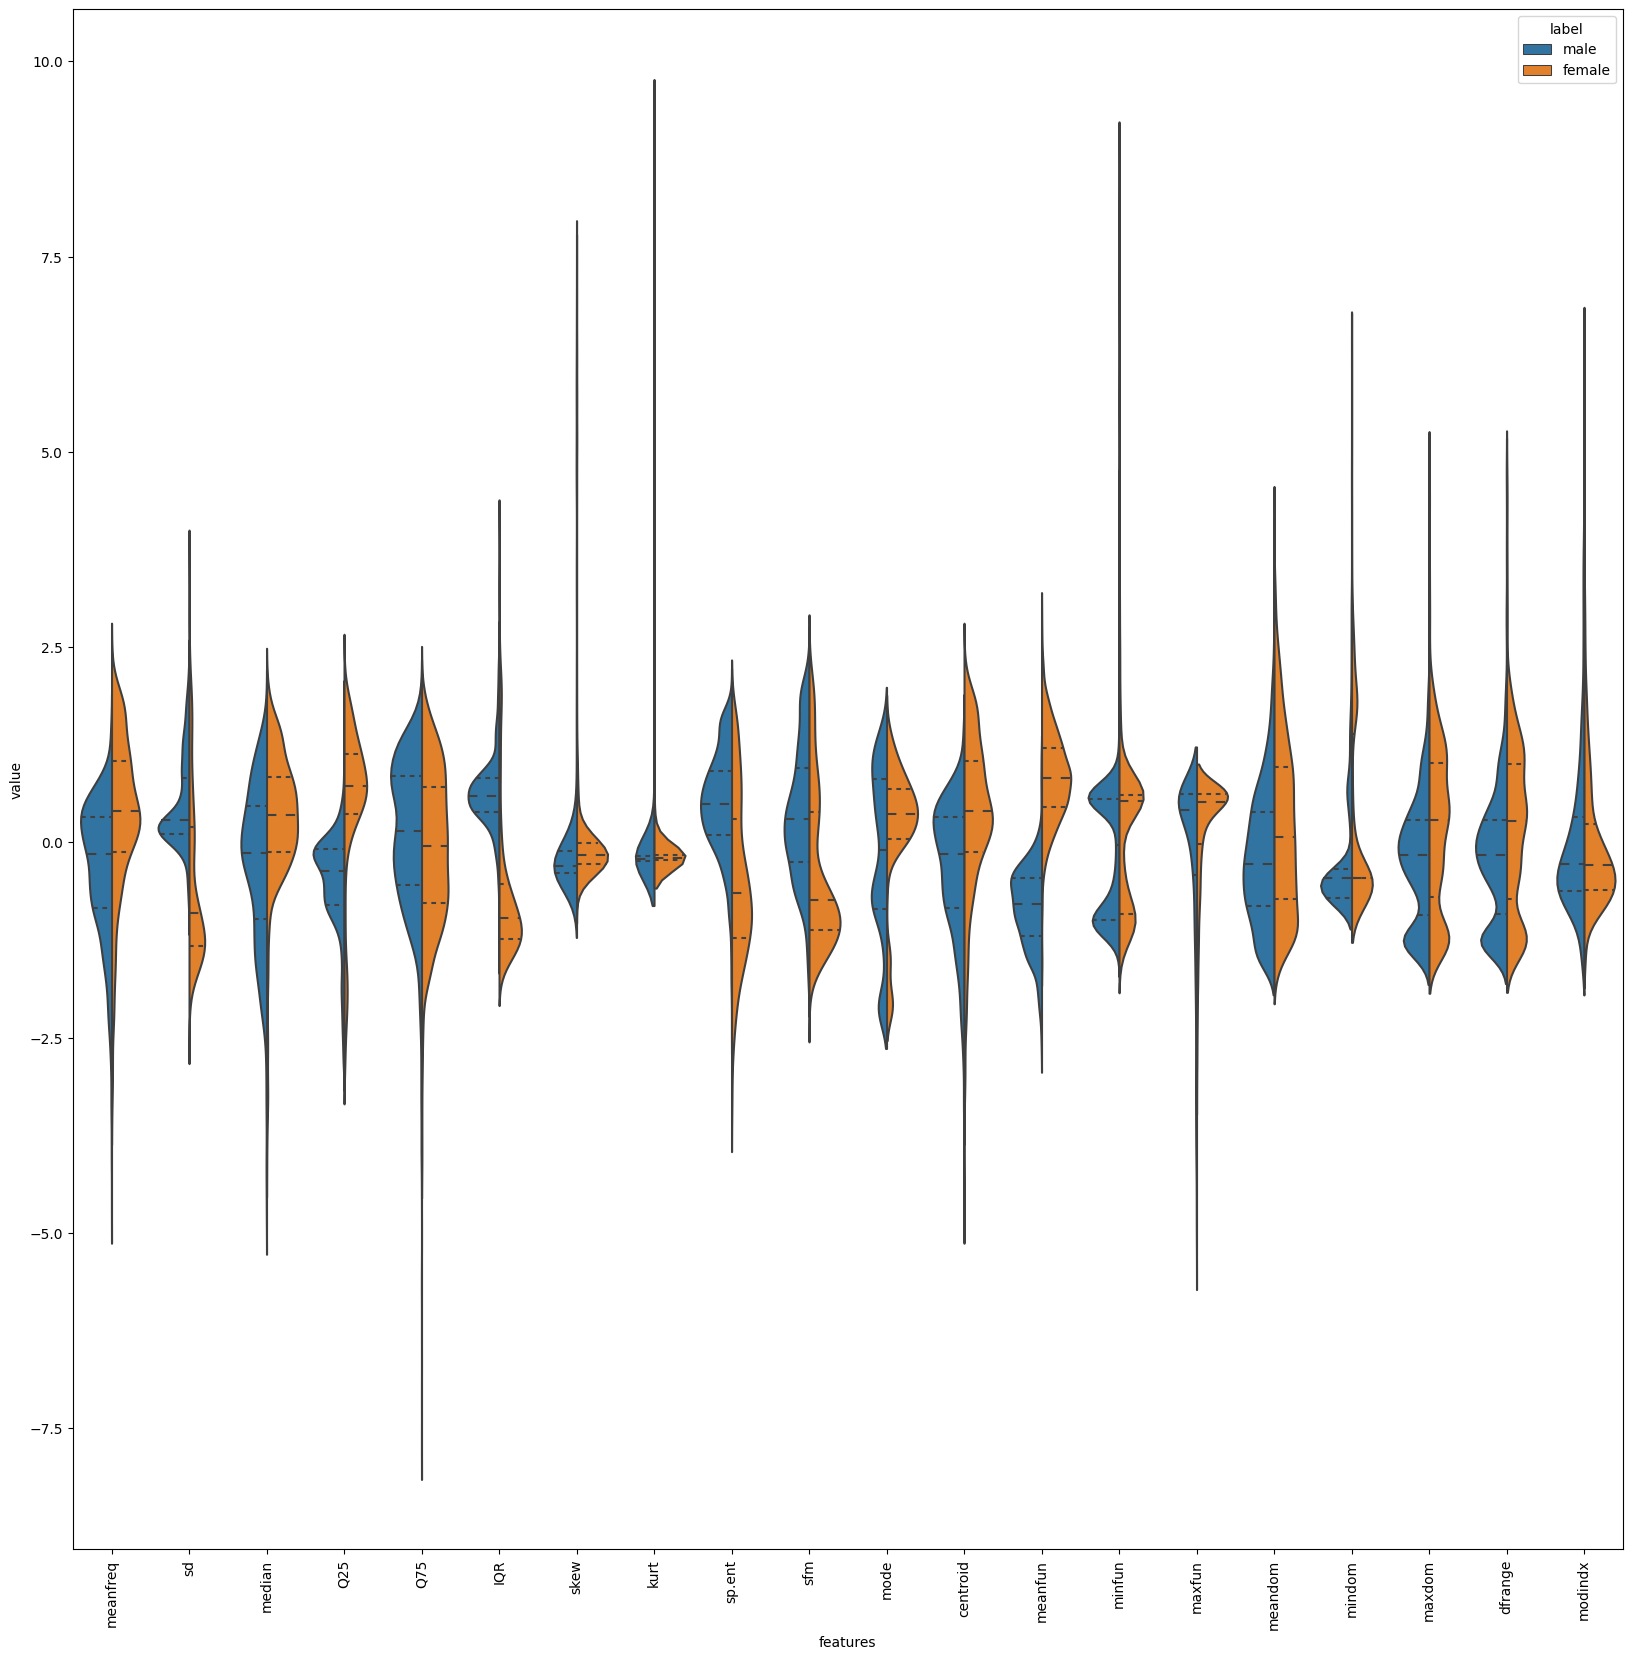

In [ ]:
plt.figure(figsize=(20, 20))

vio = pd.concat([y, X], axis=1)
vio = pd.melt(vio, id_vars='label',
                    var_name='features',
                    value_name="value")

sns.violinplot(x='features', y='value', hue='label', data=vio, split=True, inner="quart")

plt.xticks(rotation=90)

### Box plot



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

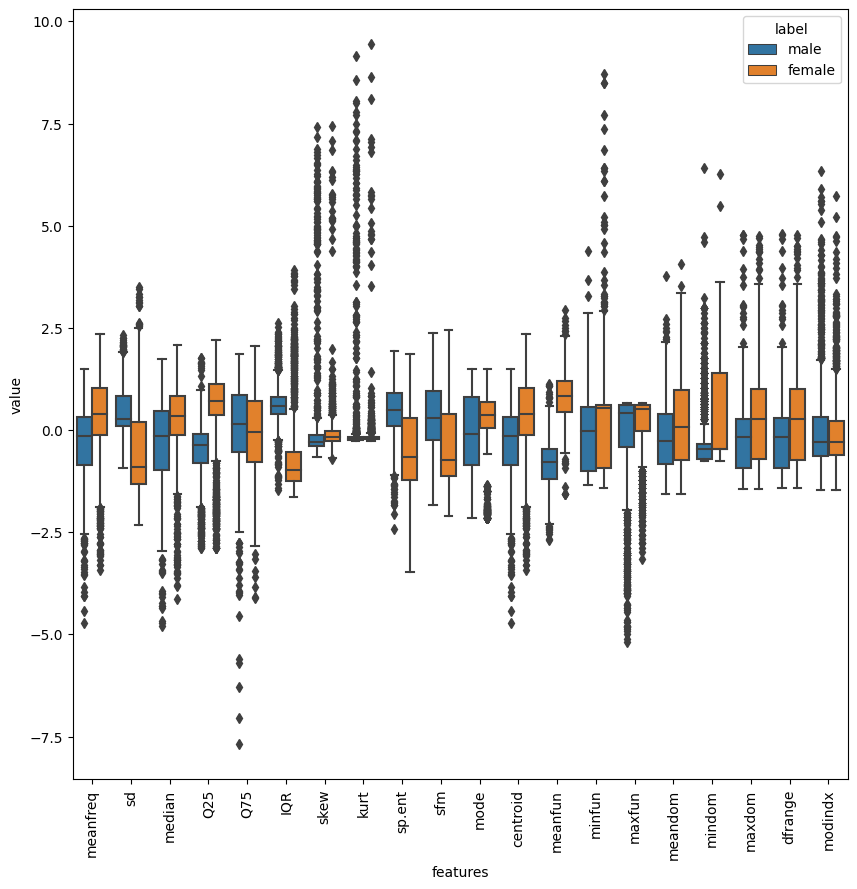

In [ ]:
plt.figure(figsize = (10, 10))

sns.boxplot(x = "features", y="value", hue='label', data = vio)

plt.xticks(rotation = 90)

### Swarm plots

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 85.5% of the points cannot be plac

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.2% of the points cannot be plac

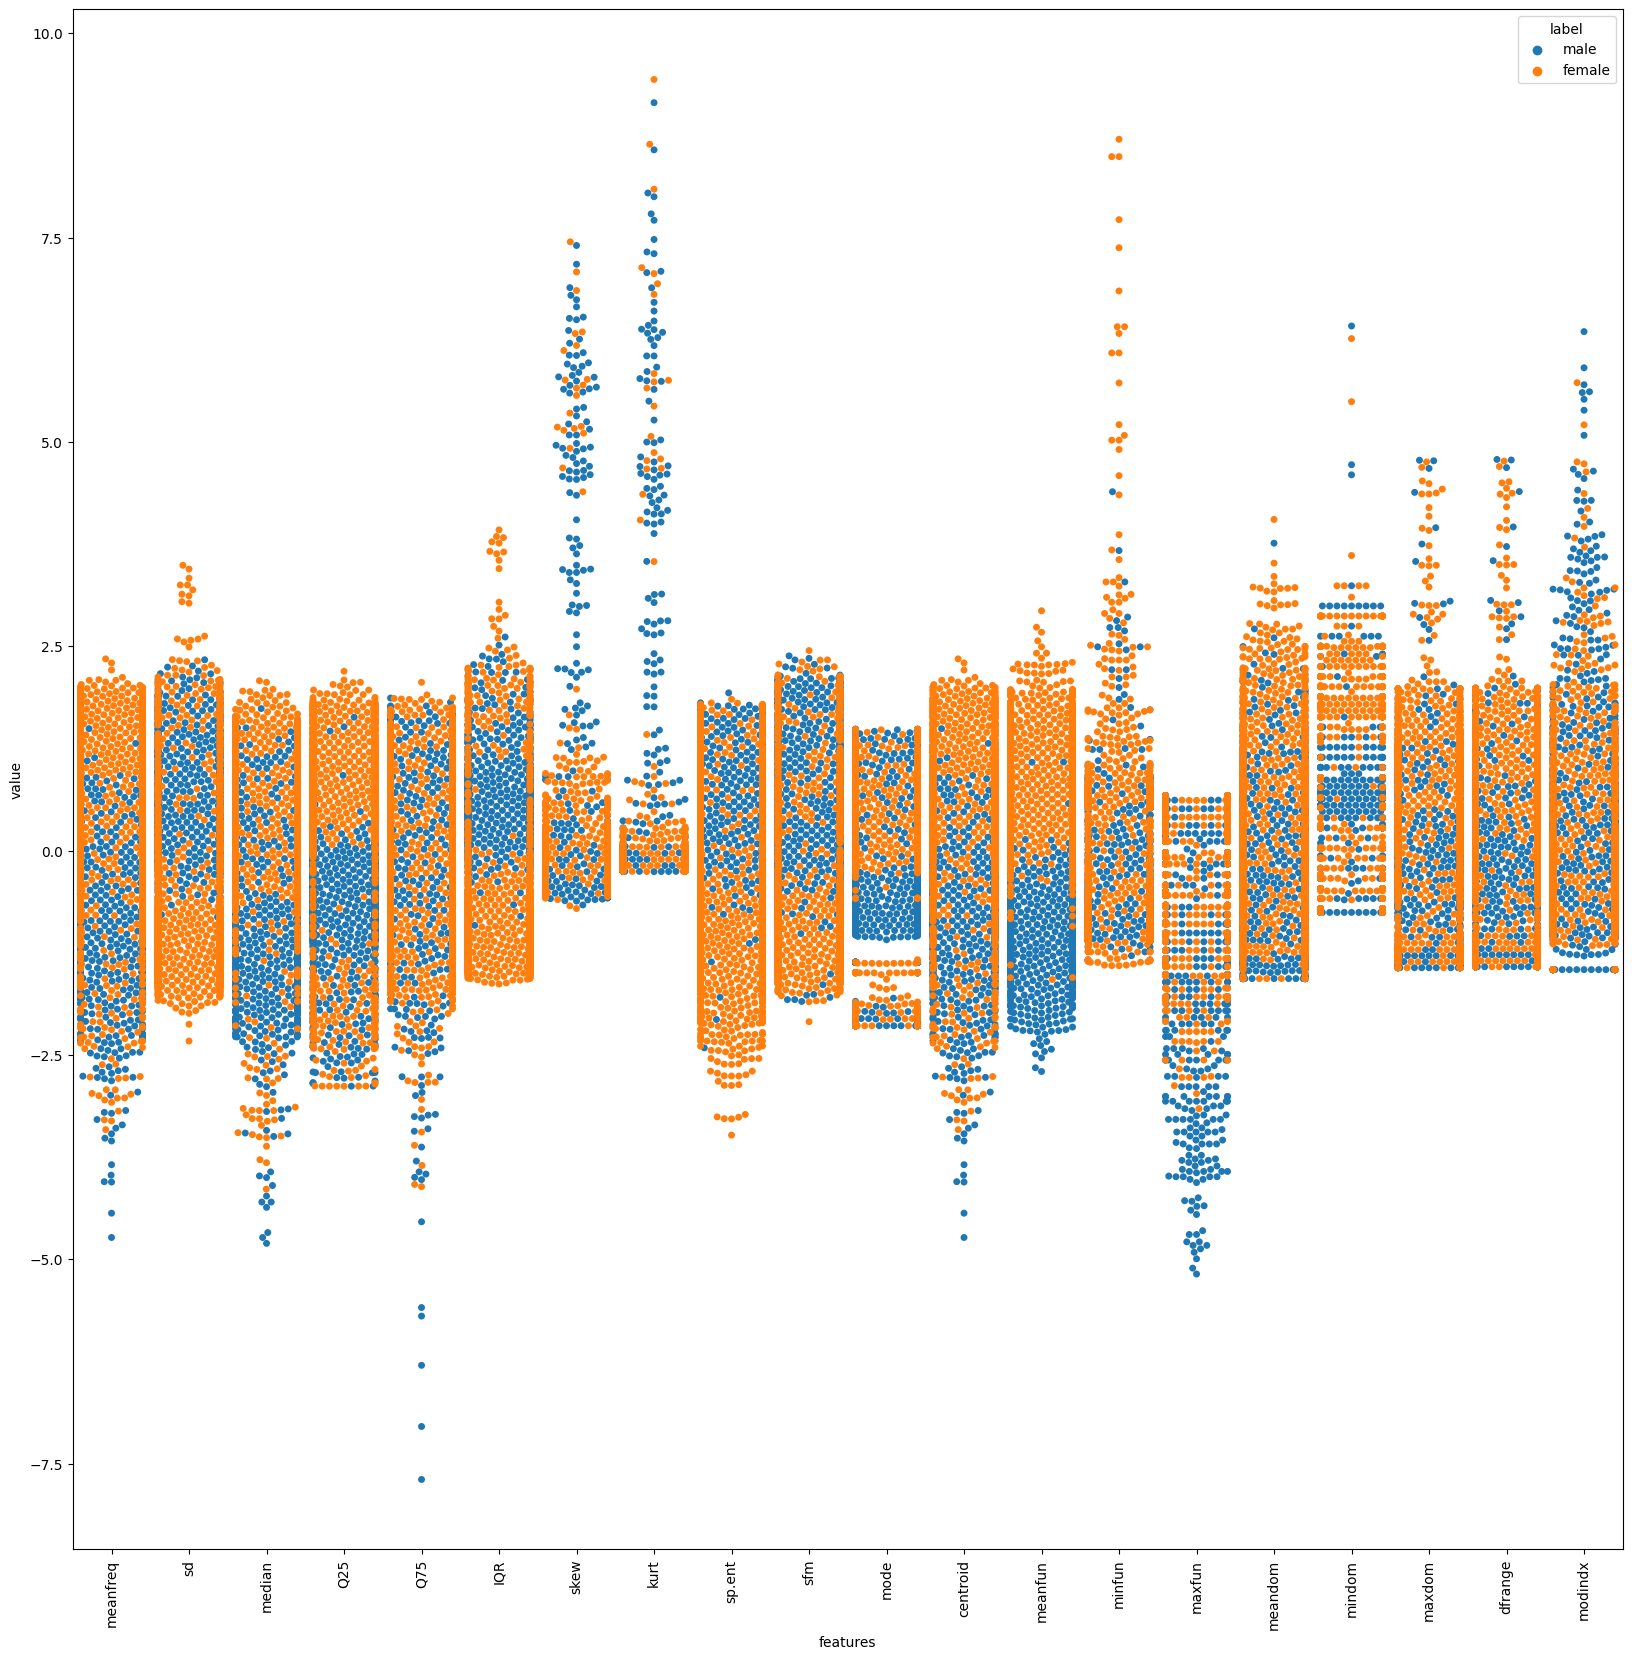

In [ ]:
plt.figure(figsize = (20, 20))

sns.swarmplot(x="features", y="value", hue="label", data=vio)

plt.xticks(rotation=90)

#### Question 2:

Preform Linear Regression, Logistic Regression, and Quadratic Discriminant Analysis on the features, graphing the resulting fits. How does the two feature fit compare to the fit on all features?

(1) Select all features



In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/voice.csv")

data

In [ ]:
## Drop feature columns
X = data.drop(columns=['label'])

## Set up target variable y
y = data['label']

## Normalize feature data by centering on the mean and dividing by std
X = (X-X.mean())/X.std()

X.describe()

Select two features: **mean_fun** and **IQR**.  
Draw the scatter plot to check the distribution

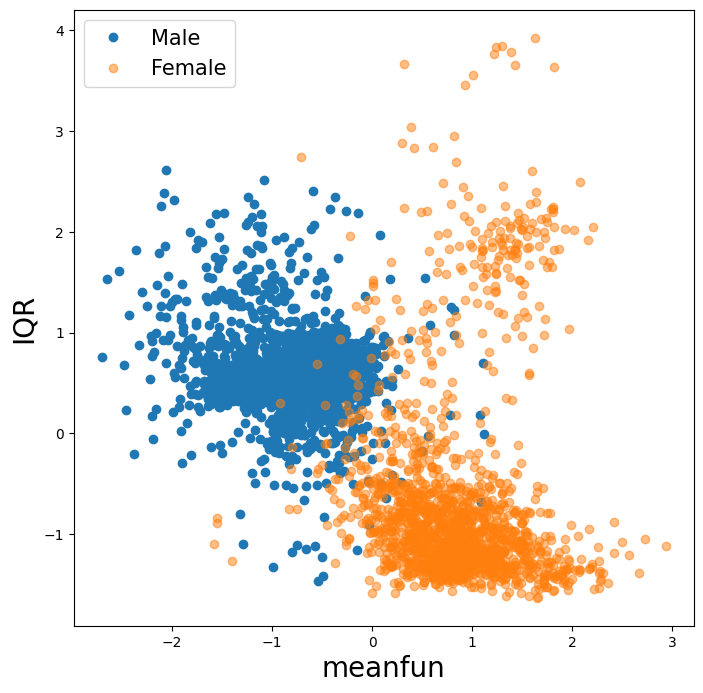

In [ ]:
f, ax = plt.subplots(figsize=(8,8))

I_m = y=="male"
I_f = y=="female"

plt.plot(X['meanfun'][I_m], X['IQR'][I_m], 'o', label="Male")

# set alpha = 0.5 to avoid points masking
plt.plot(X['meanfun'][I_f], X['IQR'][I_f], 'o', label="Female", alpha=0.5)

plt.xlabel("meanfun", fontsize = 20)
plt.ylabel("IQR", fontsize=20)
plt.legend(fontsize=15)

### Categorical Vector Encoding
Encode `y` as a one-hot vecotr

In [ ]:
y_train = pd.get_dummies(y)
display(y_train)

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3163,1,0
3164,1,0
3165,1,0
3166,1,0


### Linear Regression Using Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = X[['meanfun', 'IQR']]

# Two features to fit Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# All features to fit linear regression
lr_all = LinearRegression()
lr_all.fit(X, y_train)


print("The r^2 score on the training data with 2 selected features %.3f"%(lr.score(X_train, y_train),))
print("The r^2 score on the training data with all features is %.3f"%(lr_all.score(X, y_train),))

The r^2 score on the training data with 2 selected features 0.737
The r^2 score on the training data with all features is 0.805


In linear regression, the model with all features has a higher $R^2$ score of 0.805 while the model with two feature has a lower $R^2$ score of 0.737.

Extract the $\beta$ values from the fit using `lr.coef_` and `lr.intercept_`. Then plotting the decision boundary on the scatter plot.

In [ ]:
B0 = lr.intercept_
B = lr.coef_

print("The Linnear Coefficients:\n", B)
print("The Intercept:", B0)

The Linnear Coefficients:
 [[ 0.35221767 -0.12125969]
 [-0.35221767  0.12125969]]
The Intercept: [0.5 0.5]


(-1.9081155923981998, 4.202579881888497)

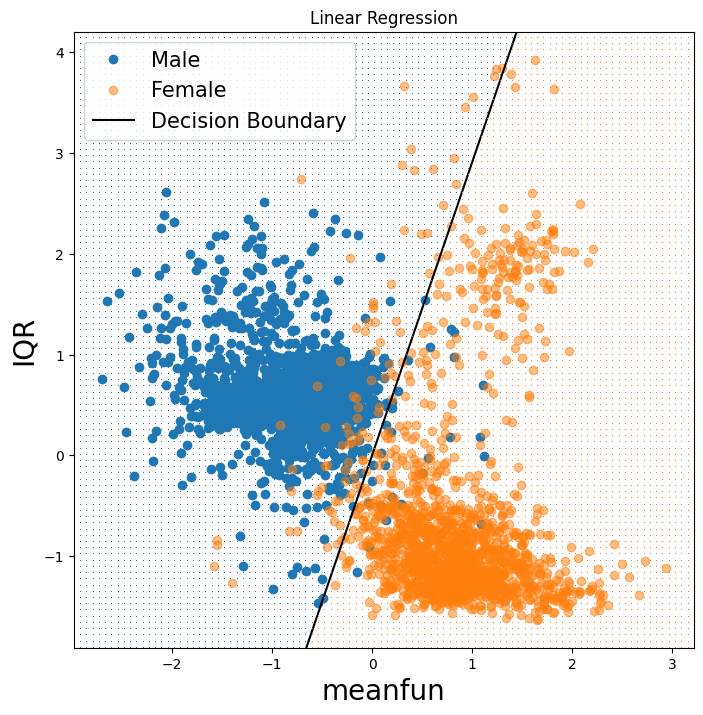

In [ ]:
from numpy.core.function_base import linspace
f, ax = plt.subplots(figsize=(8,8))

X1 = X['meanfun']
X2 = X['IQR']

plt.plot(X1[I_m], X2[I_m], 'o', label="Male")
plt.plot(X1[I_f], X2[I_f], 'o', label="Female", alpha=0.5)

xm, xM = plt.xlim()
ym, yM = plt.ylim()

u = np.linspace(xm, xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u, v, label="Decision Boundary", color="black")

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100))

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.xlabel("meanfun", fontsize = 20)
plt.ylabel("IQR", fontsize = 20)
plt.legend(fontsize = 15)
plt.title("Linear Regression")

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

### Logistic Regressioin

In [ ]:
from sklearn.linear_model import LogisticRegression

# Two features to fit logistic regression
clf = LogisticRegression()
clf.fit(X_train, y)


# All features to fit logistic regression
clf_all = LogisticRegression()
clf_all.fit(X, y)

print("Score on the training data with 2 selected features: %.3f"%clf.score(X_train, y))
print("Score on the training data with all features is %.3f"%(clf_all.score(X, y),))

Score on the training data with 2 selected features: 0.966
Score on the training data with all features is 0.975


In logistic regression, the models with two features or all features yield nearly identical scores. The model with two features has a score of 0.966, while the model with all features has a score of 0.975.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(-1.9081155923981998, 4.202579881888497)

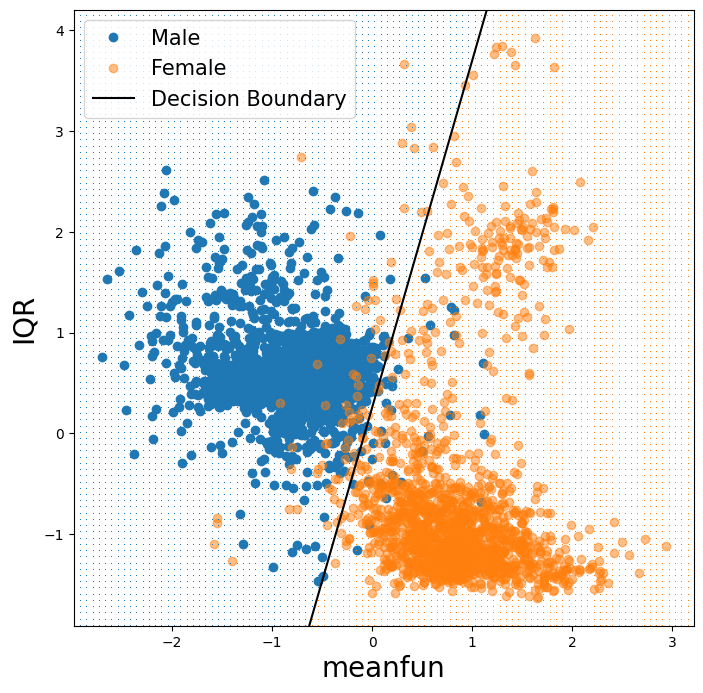

In [ ]:
f, ax = plt.subplots(figsize=(8,8))

X1= X['meanfun']
X2 = X['IQR']

plt.plot(X1[I_m], X2[I_m], 'o', label="Male")
plt.plot(X1[I_f], X2[I_f], 'o', label="Female", alpha=0.5)

xm, xM = plt.xlim()
ym, yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm, xM, 100), np.linspace(ym, yM, 100))

grid = np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = clf.predict(grid).reshape(XX.shape)

z1 = ZZ == "male"
z2 = ZZ == "female"

plt.plot(XX[z1], YY[z1], ',', color = "C0")
plt.plot(XX[z2], YY[z2], ',', color="C1")


B0 =clf.intercept_
B = clf.coef_

u = np.linspace(xm, xM, 2)
v = -(u*(B[0, 0]) + B0[0])/(B[0, 1])

plt.plot(u, v, label="Decision Boundary", color="black")

plt.xlabel("meanfun", fontsize=20)
plt.ylabel("IQR", fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

### Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# QDA with two features
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y)

# QDA with all features
qda_all = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_all.fit(X, y)

print("Score: %.3f"%qda.score(X_train, y))
print("Score on the training data with all features is : %.3f"%qda_all.score(X, y))


Score: 0.966
Score on the training data with all features is : 0.934


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA with two feature has a big higher score of 0.966 while QDA with all features achieve score of 0.934.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


(-1.9081155923981998, 4.202579881888497)

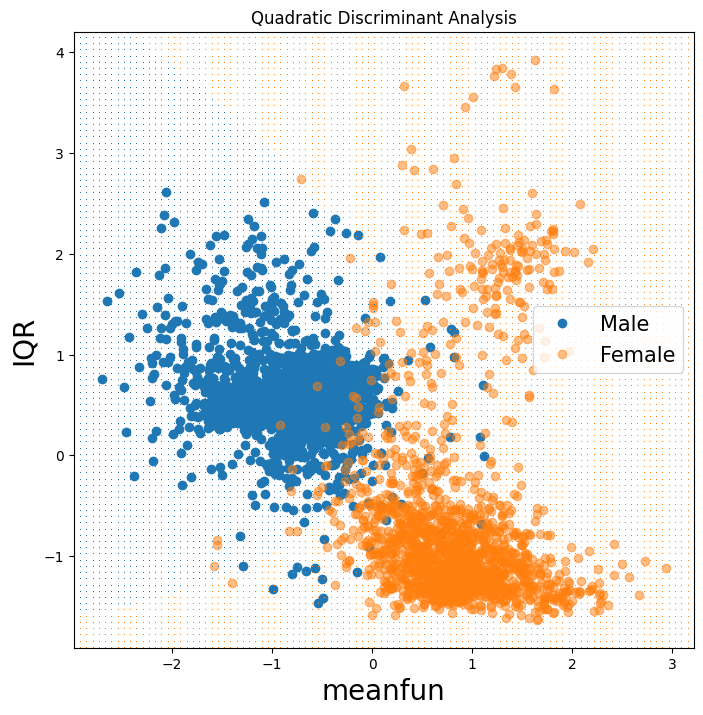

In [ ]:
f, ax = plt.subplots(figsize=(8,8))

X1 = X['meanfun']
X2 = X['IQR']

plt.plot(X1[I_m], X2[I_m], 'o', label="Male")
plt.plot(X1[I_f], X2[I_f], 'o', label="Female", alpha=0.5)

xm, xM = plt.xlim()
ym, yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm, xM, 100), np.linspace(ym, yM, 100))

grid = np.concatenate([XX.reshape(-1, 1), YY.reshape(-1, 1)], axis = 1)

ZZ = qda.predict(grid).reshape(XX.shape)

z1 = ZZ =="male"
z2 = ZZ =="female"

plt.plot(XX[z1], YY[z1], ',', color="C0")
plt.plot(XX[z2], YY[z2], ',', color="C1")

plt.xlabel("meanfun", fontsize=20)
plt.ylabel("IQR", fontsize=20)
plt.legend(fontsize=15)
plt.title("Quadratic Discriminant Analysis")

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

# Problem 2: MRI Data

The dementia level (CDR) for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels.

In this problem we want to treat them as categorical. However, we would also like to construct a slightly larger dataset, as we have seen that for images our 700 may not be sufficient. To construct a larger dataset we will again down sample the images, however this time we will use the down sampling to expand the dataset instead of throwing data away. After fixing a down sample rate $D$, we will construct one image out of the pixels $nD$, for $n = 1,2,\ldots, $. We will also construct $n D+i$, for $i = 1,\ldots, D$. This way, by down sampling with a rate $D$, we construct $D$ more pictures.

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib


labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/labels.csv")
display(labels)
y = labels.CDR

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [ ]:
file_dir = '/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/MRI_Images/'

data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(487,) (122,)


We want to sample the data array using the `data[start:stop:step]` slice paradigm. This means we are taking elements of the array `data` starting at `start`, ending at `stop` with step `step`. This is why previously `data[::DS]` down sampled at a rate of DS. For example,

    lst = list(range(165)); lst[6::10]
    
returns

    [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156]

We need to create two new arrays, one of shape $[561\times DS, 30976/DS]$ containing the down sampled data, and one of shape $[561\times DS]$ containing the labels. The for each of the $N_{train}$ images in the training array, we need to create $DS$ new down sampled images, with the downsample starting from $i$:

`Xds_train[n+i, :] = X_train[i::DS]`

This will split our images into DS down sampled images. We then need to be sure to save out the appropriate label:

In [ ]:
y_train.shape

(487,)

In [ ]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_train = y_train.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros([N_train*DS, 1])

for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train[n,i::DS]
        yds_train[n+i] = y[n]

print(Xds_train.shape)

(3896, 3872)


In [ ]:
N_train*DS

3896

In [ ]:
N_train

487

### Question 1:

Based on the code above, downsample the test data in the same way.  ()

In [ ]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_test = y_test.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_test = np.zeros([N_test*DS, im_size])
yds_test = np.zeros([N_test*DS, 1])

for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test[n,i::DS]
        yds_test[n+i] = y[n]

print(Xds_test.shape)
print(yds_test.shape)

(976, 3872)
(976, 1)


### Question 2:

Perform LDA, QDA, Logistic Regression and Categorical Linear Regression on the down sampled Oasis 1 dataset. How do these compare to linear regression?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Convert yds_train and yds_test to label encoding
label_encoder = LabelEncoder()
yds_train_encoded = label_encoder.fit_transform(yds_train)
yds_test_encoded = label_encoder.fit_transform(yds_test)


# Train and evaluate Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(Xds_train, yds_train_encoded)
logistic_pred = logistic_reg.predict(Xds_test)
logistic_accuracy = accuracy_score(yds_test_encoded, logistic_pred)
logistic_report = classification_report(yds_test_encoded, logistic_pred)


# Train and evaluate Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(Xds_train, yds_train_encoded)
logistic_pred = logistic_reg.predict(Xds_test)
logistic_accuracy = accuracy_score(yds_test_encoded, logistic_pred)
logistic_report = classification_report(yds_test_encoded, logistic_pred)


# Train and evaluate LDA
lda = LinearDiscriminantAnalysis()
lda.fit(Xds_train, yds_train_encoded)
lda_pred = lda.predict(Xds_test)
lda_accuracy = accuracy_score(yds_test_encoded, lda_pred)
lda_report = classification_report(yds_test_encoded, lda_pred)


# Train and evaluate QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(Xds_train, yds_train_encoded)
qda_pred = qda.predict(Xds_test)
qda_accuracy = accuracy_score(yds_test_encoded, qda_pred)
qda_report = classification_report(yds_test_encoded, qda_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [ ]:
# Compare the models' performance
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Report:\n", logistic_report)

print("LDA Accuracy:", lda_accuracy)
print("LDA Report:\n", lda_report)

print("QDA Accuracy:", qda_accuracy)
print("QDA Report:\n", qda_report)

Logistic Regression Accuracy: 0.9436475409836066
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       925
           1       0.33      0.27      0.30        30
           2       0.00      0.00      0.00        21

    accuracy                           0.94       976
   macro avg       0.43      0.42      0.42       976
weighted avg       0.92      0.94      0.93       976

LDA Accuracy: 0.9262295081967213
LDA Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       925
           1       0.23      0.37      0.29        30
           2       0.14      0.10      0.11        21

    accuracy                           0.93       976
   macro avg       0.45      0.48      0.46       976
weighted avg       0.93      0.93      0.93       976

QDA Accuracy: 0.8852459016393442
QDA Report:
               precision    recall  f1-score   support

           0 

In [ ]:
# Categorical Linear Regression
from sklearn.linear_model import LinearRegression

# Convert yds_train and yds_test to one-hot encoding
yds_train_onehot = pd.get_dummies(yds_train.reshape(-1,))
yds_test_onehot = pd.get_dummies(yds_test.reshape(-1,))

# Train and evaluate Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(Xds_train, yds_train_onehot)
linear_pred = linear_reg.predict(Xds_test)

linear_pred = np.argmax(linear_pred, axis=1)
yds_test_max =np.argmax(yds_test, axis=1)

linear_score = accuracy_score(yds_test_max, linear_pred)
linear_report = classification_report(yds_test_max, linear_pred)


print("Linear Accuracy:", linear_score)
print("Linear Report:\n", linear_report)


Linear Accuracy: 0.9415983606557377
Linear Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       976
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.94       976
   macro avg       0.25      0.24      0.24       976
weighted avg       1.00      0.94      0.97       976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



(Categorical) Linear Regression Accuracy: 0.942   
Logistic Regression Accuracy: 0.944    
LDA Accuracy: 0.926  
QDA Accuracy: 0.885    
Both Linear Regression and Logistic Regression shows the same accurary, while LDA model is slightly bit lower, maintains a 0.926 accurary. QDA models has the lowest accuracy of 0.885 among these four models.